In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

Starting Advanced Exploratory Data Analysis...
Dataset Shape: (50000, 14)

Missing Values:
 num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


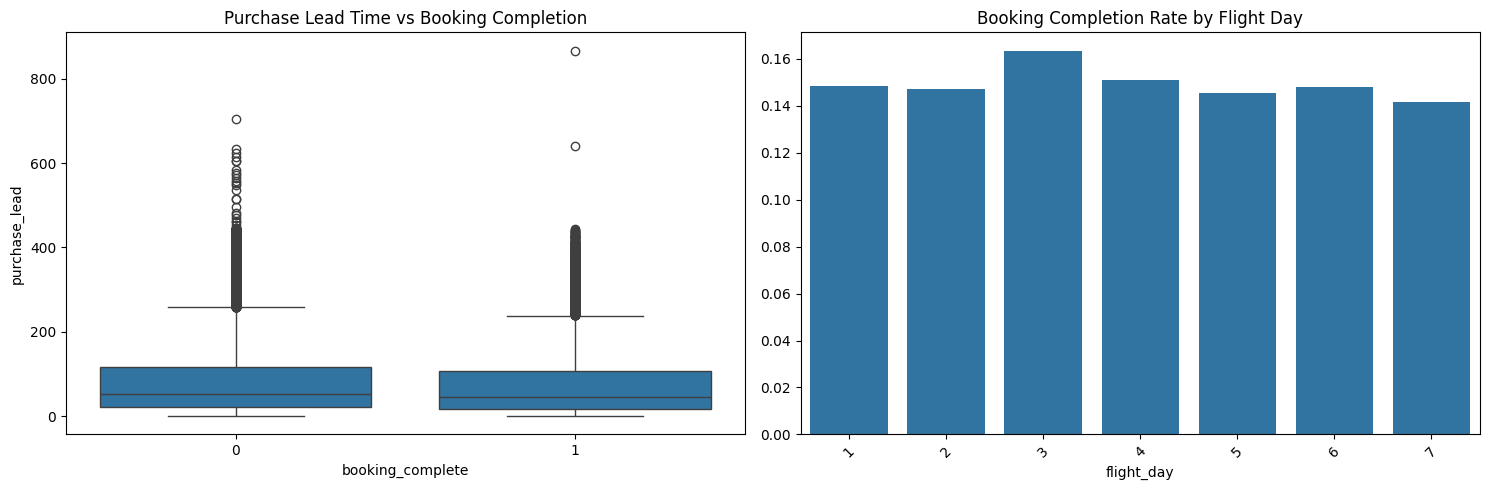

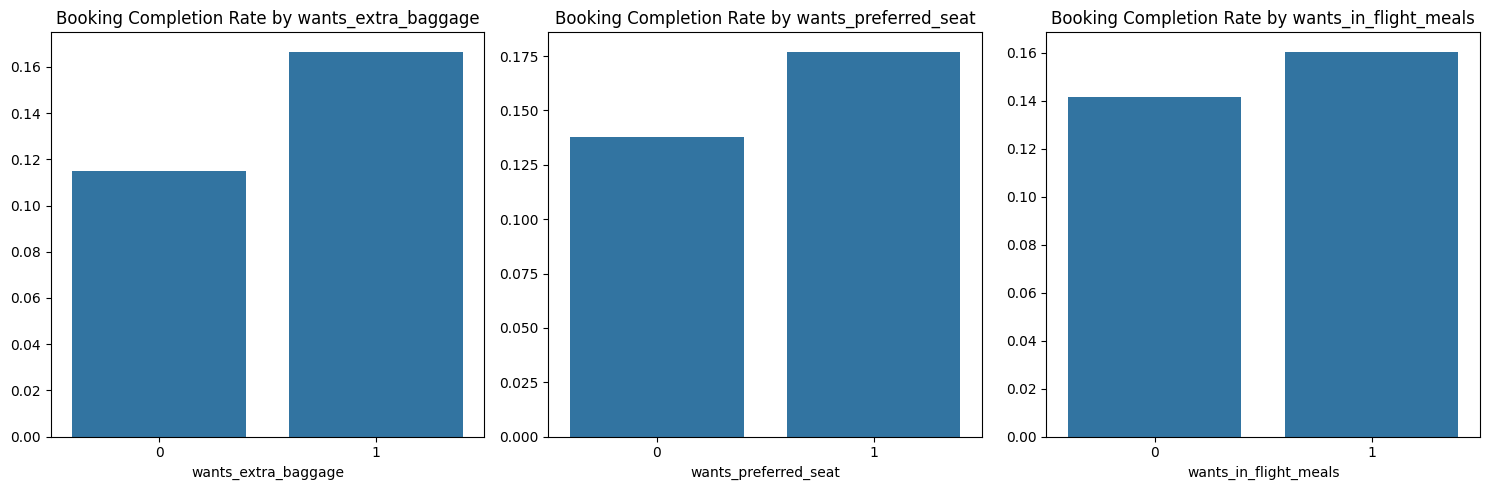

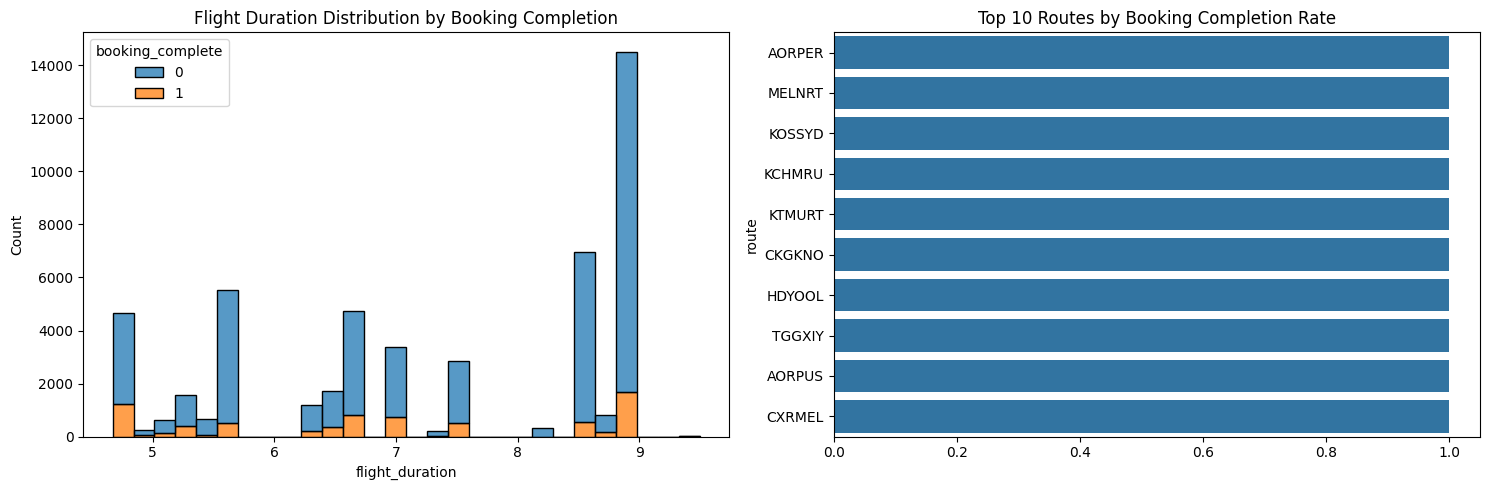


Correlations with booking completion:
booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
flight_day              -0.006986
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_duration         -0.106266
Name: booking_complete, dtype: float64

Preprocessing Data and Engineering Features...

Training and Comparing Models...


c:\Users\zakie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zakie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zakie\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

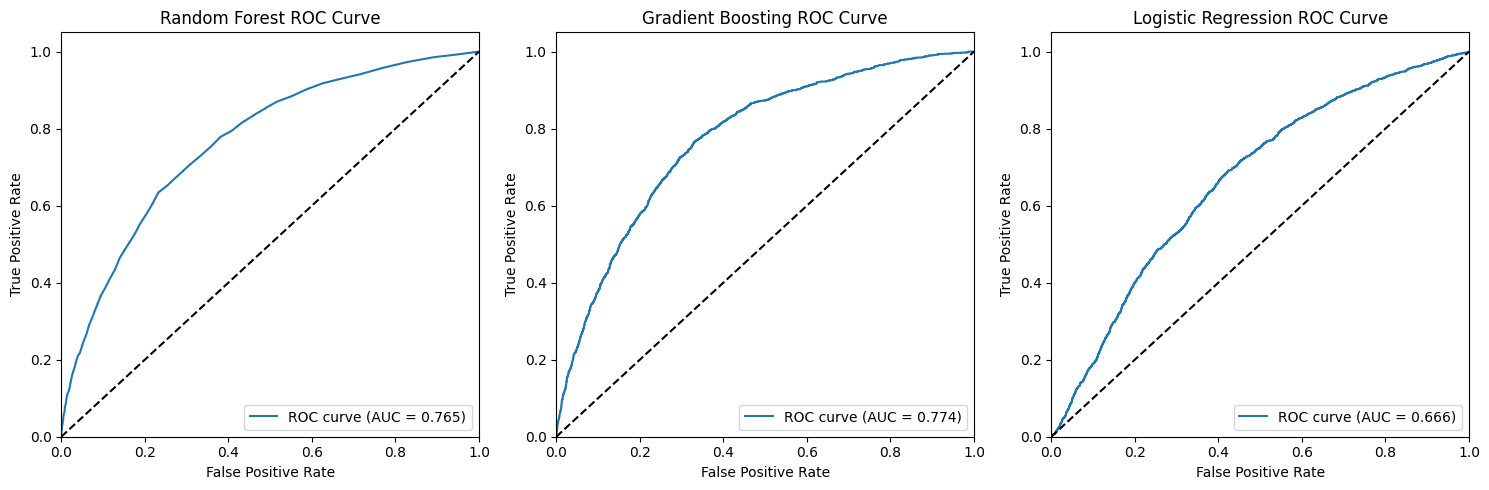


=== Model Performance Metrics ===

All metrics shown as percentages:
                    Training Accuracy Testing Accuracy ROC AUC Score  \
Model Name                                                             
Random Forest                  99.99%           85.57%        76.52%   
Gradient Boosting              85.14%           85.36%        77.44%   
Logistic Regression            85.00%           85.20%        66.64%   

                    Precision (Class 1) Recall (Class 1) F1-Score (Class 1)  
Model Name                                                                   
Random Forest                    56.27%           11.22%             18.70%  
Gradient Boosting                63.79%            2.50%              4.81%  
Logistic Regression               0.00%            0.00%              0.00%  

=== Detailed Model Performance Analysis ===

Random Forest:
- Training Accuracy: 99.99%
- Testing Accuracy: 85.57%
- ROC AUC Score: 76.52%
- Precision: 56.27%
- Recall: 11.22%
- 

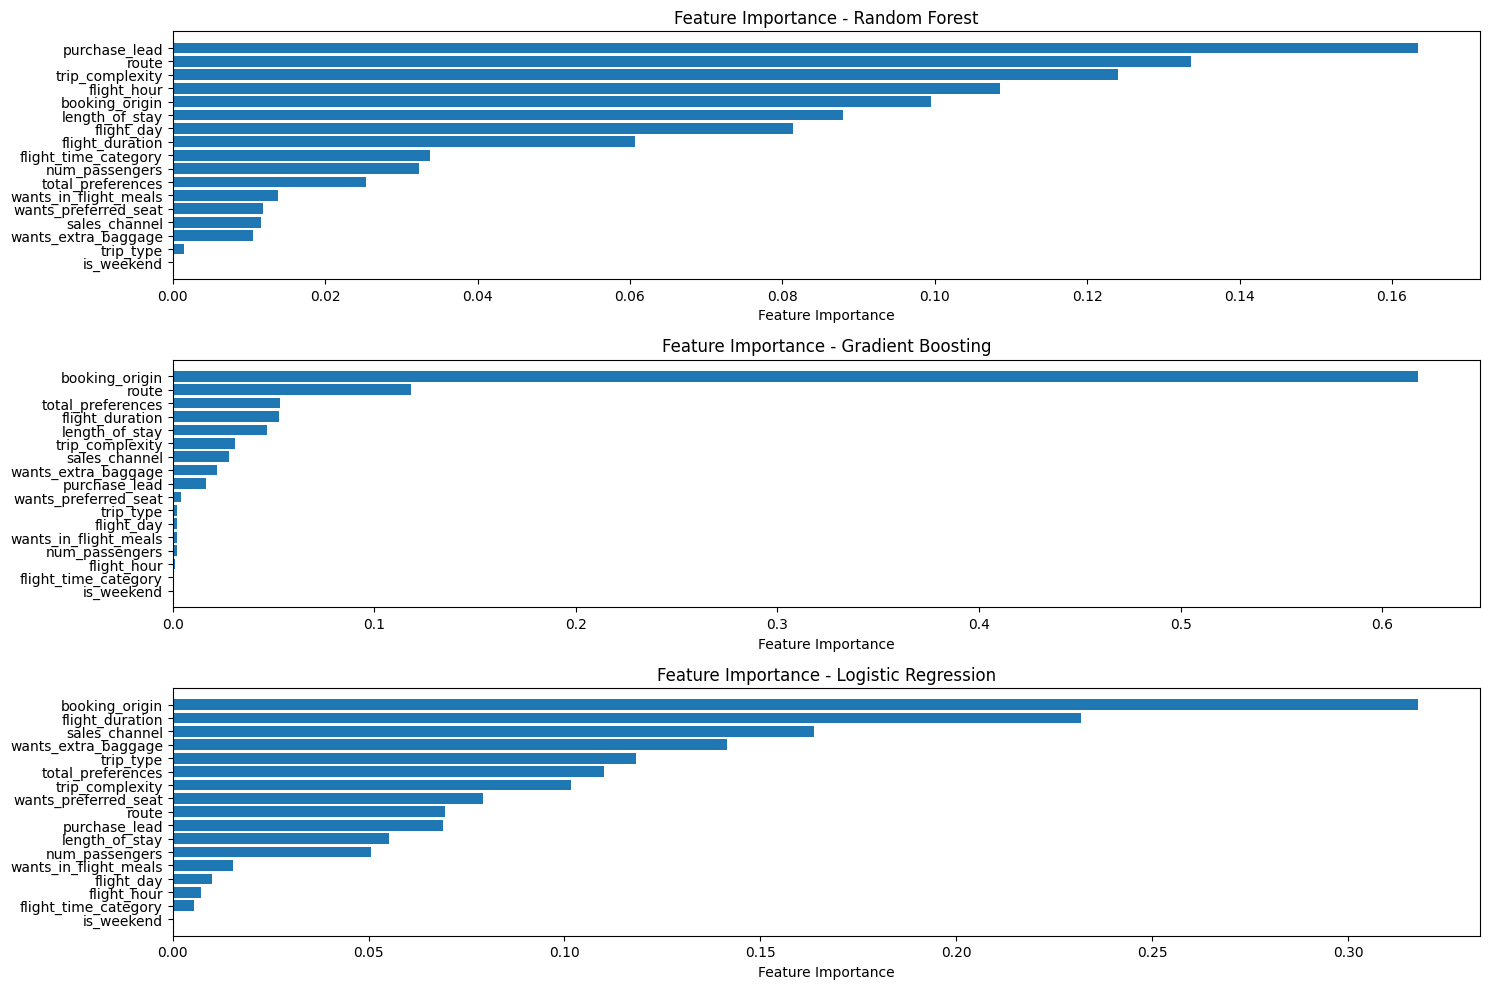


Detailed Feature Importance Rankings:

Random Forest Top 10 Important Features:
             feature  importance
       purchase_lead    0.163390
               route    0.133646
     trip_complexity    0.124106
         flight_hour    0.108600
      booking_origin    0.099487
      length_of_stay    0.087919
          flight_day    0.081438
     flight_duration    0.060715
flight_time_category    0.033753
      num_passengers    0.032283

Gradient Boosting Top 10 Important Features:
             feature  importance
      booking_origin    0.617602
               route    0.118324
   total_preferences    0.053367
     flight_duration    0.052487
      length_of_stay    0.046926
     trip_complexity    0.030900
       sales_channel    0.027674
 wants_extra_baggage    0.022015
       purchase_lead    0.016428
wants_preferred_seat    0.004313

Logistic Regression Top 10 Important Features:
             feature  importance
      booking_origin    0.317804
     flight_duration    0.231932


In [4]:
def perform_advanced_eda(df):
    """
    Perform detailed exploratory data analysis with specific focus areas
    """
    # Basic statistics
    print("Dataset Shape:", df.shape)
    print("\nMissing Values:\n", df.isnull().sum())
    
    # 1. Temporal Analysis
    plt.figure(figsize=(15, 5))
    
    # Purchase lead time distribution by booking completion
    plt.subplot(1, 2, 1)
    sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
    plt.title('Purchase Lead Time vs Booking Completion')
    
    # Booking completion rate by flight day
    plt.subplot(1, 2, 2)
    completion_by_day = df.groupby('flight_day')['booking_complete'].mean().sort_values(ascending=False)
    sns.barplot(x=completion_by_day.index, y=completion_by_day.values)
    plt.title('Booking Completion Rate by Flight Day')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Customer Preferences Analysis
    preference_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
    
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(preference_cols, 1):
        plt.subplot(1, 3, i)
        completion_rate = df.groupby(col)['booking_complete'].mean()
        sns.barplot(x=completion_rate.index, y=completion_rate.values)
        plt.title(f'Booking Completion Rate by {col}')
    plt.tight_layout()
    plt.show()

    # 3. Route and Duration Analysis
    plt.figure(figsize=(15, 5))
    
    # Flight duration distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='flight_duration', hue='booking_complete', multiple="stack")
    plt.title('Flight Duration Distribution by Booking Completion')
    
    # Top 10 routes by booking completion rate
    plt.subplot(1, 2, 2)
    route_completion = df.groupby('route')['booking_complete'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=route_completion.values, y=route_completion.index)
    plt.title('Top 10 Routes by Booking Completion Rate')
    plt.tight_layout()
    plt.show()

    # 4. Advanced Correlation Analysis
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    correlations = df[numeric_cols].corr()['booking_complete'].sort_values(ascending=False)
    print("\nCorrelations with booking completion:")
    print(correlations)

    return correlations

def advanced_preprocessing(df):
    """
    Enhanced preprocessing with proper handling of NaN values and categorical variables
    """
    df_processed = df.copy()
    
    # 1. Handle missing values first
    # Fill numeric columns with median
    numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())
    
    # Fill categorical columns with mode
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])
    
    # 2. Create numeric features
    # Weekend feature
    df_processed['is_weekend'] = df_processed['flight_day'].isin(['sat', 'sun']).astype(int)
    
    # Trip complexity score
    df_processed['trip_complexity'] = (df_processed['num_passengers'] * 
                                     df_processed['length_of_stay'] * 
                                     df_processed['flight_duration'])
    
    # Customer preferences score
    preference_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
    df_processed['total_preferences'] = df_processed[preference_cols].sum(axis=1)
    
    # 3. Create flight time categories safely
    # First ensure flight_hour is numeric and handle any missing values
    df_processed['flight_hour'] = pd.to_numeric(df_processed['flight_hour'], errors='coerce')
    df_processed['flight_hour'] = df_processed['flight_hour'].fillna(df_processed['flight_hour'].median())
    
    # Now create categories
    df_processed['flight_time_category'] = np.where(df_processed['flight_hour'] < 6, 0,
                                         np.where(df_processed['flight_hour'] < 12, 1,
                                         np.where(df_processed['flight_hour'] < 18, 2, 3)))
    
    # 4. Handle remaining categorical variables
    # Get updated list of categorical columns
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    
    # Label encode all categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df_processed[col] = le.fit_transform(df_processed[col])
    
    # 5. Separate features and target
    columns_to_drop = ['booking_complete']
    X = df_processed.drop(columns_to_drop, axis=1)
    y = df_processed['booking_complete']
    
    # 6. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 7. Scale numeric features
    # Get final list of numeric columns
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # Scale only numeric columns
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
    
    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

def evaluate_model_performance(model_name, model, X_train, X_test, y_train, y_test):
    """
    Evaluate model performance with multiple metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    roc_auc_score = auc(*roc_curve(y_test, y_pred_proba)[:2])
    
    # Get classification report as dictionary
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    metrics = {
        'Model Name': model_name,
        'Training Accuracy': train_score,
        'Testing Accuracy': test_score,
        'ROC AUC Score': roc_auc_score,
        'Precision (Class 1)': class_report['1']['precision'],
        'Recall (Class 1)': class_report['1']['recall'],
        'F1-Score (Class 1)': class_report['1']['f1-score']
    }
    
    return metrics

def plot_feature_importance(model_results, feature_names):
    """
    Plot feature importance comparison across different models
    """
    # Set up the figure
    plt.figure(figsize=(15, 10))
    
    # Number of models and features
    n_models = len(model_results)
    n_features = len(feature_names)
    
    # Create subplots for each model
    for i, (model_name, results) in enumerate(model_results.items(), 1):
        plt.subplot(n_models, 1, i)
        
        # Get feature importance
        if model_name == 'Logistic Regression':
            importance = np.abs(results['model'].coef_[0])
        else:
            importance = results['model'].feature_importances_
        
        # Create DataFrame for sorting
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        })
        importance_df = importance_df.sort_values('importance', ascending=True)
        
        # Create horizontal bar plot
        plt.barh(range(n_features), importance_df['importance'])
        plt.yticks(range(n_features), importance_df['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        
    plt.tight_layout()
    plt.show()

    # Print detailed feature importance rankings
    print("\nDetailed Feature Importance Rankings:")
    for model_name, results in model_results.items():
        print(f"\n{model_name} Top 10 Important Features:")
        
        if model_name == 'Logistic Regression':
            importance = np.abs(results['model'].coef_[0])
        else:
            importance = results['model'].feature_importances_
            
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=False)
        
        print(importance_df.head(10).to_string(index=False))

def compare_models(X_train, X_test, y_train, y_test, feature_names):
    """
    Train and compare multiple models with detailed performance metrics
    """
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
    }
    
    results = {}
    all_metrics = []
    
    # Plot ROC curves
    plt.figure(figsize=(15, 5))
    
    for i, (name, model) in enumerate(models.items(), 1):
        # Train model
        model.fit(X_train, y_train)
        
        # Get performance metrics
        metrics = evaluate_model_performance(name, model, X_train, X_test, y_train, y_test)
        all_metrics.append(metrics)
        
        # Plot ROC curve
        plt.subplot(1, 3, i)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = metrics['ROC AUC Score']
        
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        
        # Store results
        results[name] = {
            'model': model,
            'metrics': metrics
        }
    
    plt.tight_layout()
    plt.show()
    
    # Display performance metrics
    metrics_df = pd.DataFrame(all_metrics)
    metrics_df = metrics_df.set_index('Model Name')
    
    # Format metrics as percentages
    formatted_metrics = metrics_df.apply(lambda x: [f"{val:.2%}" for val in x])
    
    print("\n=== Model Performance Metrics ===")
    print("\nAll metrics shown as percentages:")
    print(formatted_metrics)
    
    # Print detailed interpretation for each model
    print("\n=== Detailed Model Performance Analysis ===")
    for model_name, data in results.items():
        metrics = data['metrics']
        print(f"\n{model_name}:")
        print(f"- Training Accuracy: {metrics['Training Accuracy']:.2%}")
        print(f"- Testing Accuracy: {metrics['Testing Accuracy']:.2%}")
        print(f"- ROC AUC Score: {metrics['ROC AUC Score']:.2%}")
        print(f"- Precision: {metrics['Precision (Class 1)']:.2%}")
        print(f"- Recall: {metrics['Recall (Class 1)']:.2%}")
        print(f"- F1-Score: {metrics['F1-Score (Class 1)']:.2%}")
        
        # Add interpretation
        if metrics['Training Accuracy'] - metrics['Testing Accuracy'] > 0.05:
            print("  Note: Model shows signs of overfitting")
        elif metrics['ROC AUC Score'] > 0.8:
            print("  Note: Model shows strong predictive performance")
        elif metrics['ROC AUC Score'] < 0.6:
            print("  Note: Model shows weak predictive performance")
    
    # Plot feature importance
    plot_feature_importance(results, feature_names)
    
    return results

def main():
    """
    Main execution function
    """
    print("Starting Advanced Exploratory Data Analysis...")
    correlations = perform_advanced_eda(df)
    
    print("\nPreprocessing Data and Engineering Features...")
    X_train, X_test, y_train, y_test, feature_names = advanced_preprocessing(df)
    
    print("\nTraining and Comparing Models...")
    model_results = compare_models(X_train, X_test, y_train, y_test, feature_names)
    
    return model_results

if __name__ == "__main__":
    model_results = main()